In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
import scipy.stats as stats
from scipy.stats import kstest

In [4]:
flights = pd.read_csv("../data/flights_sample5pct.csv",low_memory=False)
passengers=pd.read_csv("../data/passengers.csv")
fuel=pd.read_csv("../data/fuel_comsumption.csv")

In [7]:
flights.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,0,2018-09-20,DL,DL_CODESHARE,DL,7362,OO,N8942A,7362,13459,...,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-09-20,DL,DL_CODESHARE,DL,7369,OO,N429SW,7369,10333,...,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018-09-20,DL,DL_CODESHARE,DL,7383,OO,N979EV,7383,11122,...,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-09-20,DL,DL_CODESHARE,DL,7406,OO,N429SW,7406,13459,...,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018-09-20,DL,DL_CODESHARE,DL,7408,OO,N465SW,7408,14150,...,69,0.0,0.0,16.0,0.0,57.0,NaN,NaN,NaN,NaN


In [6]:
flights.isna().sum()


Unnamed: 0                  0
fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                 2514
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                12909
dep_delay               13147
taxi_out                13591
wheels_off              13591
wheels_on               13983
taxi_in                 13983
crs_arr_time                0
arr_time                13683
arr_delay               15508
cancelled                   0
cancellation_code      782924
diverted                    0
dup                         0
crs_elapsed_time            2
actual_elapsed_time     15379
air_time                15679
flights                     0
distance  

In [8]:
# Flights columns to drop due to high Nans
drop_cols = ['carrier_delay',
'weather_delay',
'nas_delay',
'security_delay',
'late_aircraft_delay',
'first_dep_time',
'total_add_gtime',
'longest_add_gtime',
'no_name','cancellation_code']
flights = flights.drop(drop_cols, axis =1)

In [10]:
passengers.isna().sum()


departures_scheduled     0
departures_performed     0
payload                  0
seats                    0
passengers               0
freight                  0
mail                     0
distance                 0
ramp_to_ramp             0
air_time                 0
unique_carrier           0
airline_id               0
unique_carrier_name      0
region                   0
carrier                  0
carrier_name             0
carrier_group            0
carrier_group_new        0
origin_airport_id        0
origin_city_market_id    0
origin                   0
origin_city_name         0
origin_country           3
origin_country_name      0
dest_airport_id          0
dest_city_market_id      0
dest                     0
dest_city_name           0
dest_country             0
dest_country_name        0
aircraft_group           0
aircraft_type            0
aircraft_config          0
year                     0
month                    0
distance_group           0
class                    0
d

In [11]:
fuel.isna().sum()


month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [12]:
flights.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,...,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,0,2018-09-20,DL,DL_CODESHARE,DL,7362,OO,N8942A,7362,13459,...,732.0,-17.0,0,0,N,78.0,69.0,58.0,1,300
1,1,2018-09-20,DL,DL_CODESHARE,DL,7369,OO,N429SW,7369,10333,...,557.0,-16.0,0,0,N,45.0,40.0,19.0,1,69
2,2,2018-09-20,DL,DL_CODESHARE,DL,7383,OO,N979EV,7383,11122,...,1256.0,-13.0,0,0,N,84.0,80.0,62.0,1,320
3,3,2018-09-20,DL,DL_CODESHARE,DL,7406,OO,N429SW,7406,13459,...,1617.0,-18.0,0,0,N,85.0,74.0,57.0,1,349
4,4,2018-09-20,DL,DL_CODESHARE,DL,7408,OO,N465SW,7408,14150,...,2342.0,73.0,0,0,N,39.0,55.0,30.0,1,69


##### Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0.


In [13]:
delays = pd.concat([flights.arr_delay, flights.dep_delay], axis = 0)
delays_3std = delays[~((delays -delays.mean()).abs() > 3*delays.std())]
print(delays_3std.skew()) 
print(delays_3std.mean()) 

2.5544032368277465
3.639123034896315


<AxesSubplot:>

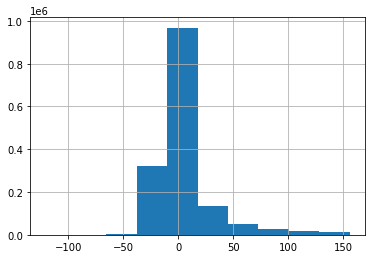

In [14]:
delays_3std.hist()

<AxesSubplot:>

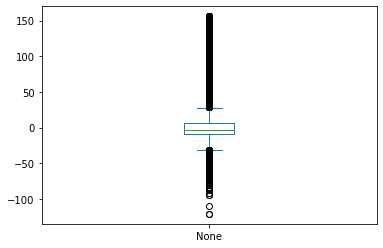

In [15]:
delays_3std.plot(kind='box')

In [16]:
delays_3std.fillna(delays_3std.mean(),inplace=True)

ks_statistic, p_value = kstest(delays_3std, 'norm',)
print(ks_statistic, p_value)

0.5572811278444391 0.0


In [17]:
stats.shapiro(delays_3std)


/Users/phanisingaraju/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7326246500015259, pvalue=0.0)

 Pvalue < 0.05 so we assume this is not normally distributed

##### Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [20]:
date_split = flights['fl_date'].str.split('-')
date_split[:3]
flights['year'] = [x[0] for x in date_split]
flights['month'] = [x[1] for x in date_split]
flights['day'] = [x[2] for x in date_split]

In [21]:
flights_sample_delay = flights.filter(['year','month','dep_delay','arr_delay'], axis=1)

In [22]:
flights_sample_delay

,year,month,dep_delay,arr_delay
0,2018,09,-8.0,-17.0
1,2018,09,-11.0,-16.0
2,2018,09,-9.0,-13.0
3,2018,09,-7.0,-18.0
4,2018,09,57.0,73.0
...,...,...,...,...
796323,2018,09,-7.0,-17.0
796324,2018,09,21.0,3.0
796325,2018,09,-5.0,-14.0
796326,2018,09,-8.0,12.0


<AxesSubplot:title={'center':'Average Monthly Arrival Delays'}, xlabel='month'>

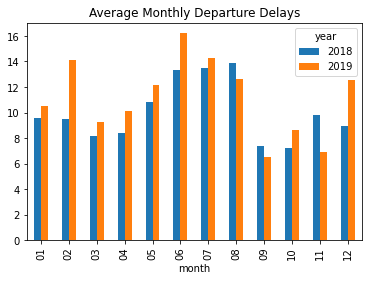

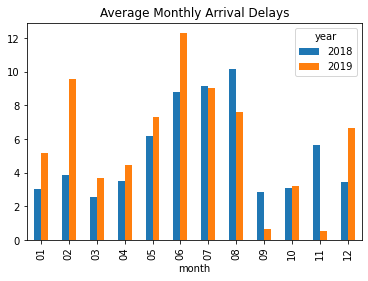

In [23]:
flights_sample_delay.groupby(['year','month'])['dep_delay'].mean().unstack('year').plot.bar(title= 'Average Monthly Departure Delays')
flights_sample_delay.groupby(['year','month'])['arr_delay'].mean().unstack('year').plot.bar(title= 'Average Monthly Arrival Delays')

The monthly delays are different during the year. June, July , August are the months with more delays. In 2019, there is a significant delay in the month of February as well. This might be due to weather.

##### Does the weather affect the delay?

Used the API to pull the weather information for flights. The weather is not taken for all the flights and the right representative sample is chosen to get the weather on four types:
sunny
cloudy
rainy
snow
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different? 

##### How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [24]:
flights_sample_taxi=flights.filter(['year','month','day','crs_dep_time','wheels_off','taxi_out','crs_arr_time','wheels_on','taxi_in'], axis=1)

In [25]:
bins = [0, 300, 600, 900, 1200, 1500, 1800, 2100, 2400]
flights_sample_taxi['binned_dep'] = np.searchsorted(bins, flights_sample_taxi['crs_dep_time'].values)
flights_sample_taxi['binned_arr'] = np.searchsorted(bins, flights_sample_taxi['crs_arr_time'].values)

In [26]:
flights_sample_taxi= flights_sample_taxi.dropna(how='all', subset=['taxi_out', 'taxi_in'])


<AxesSubplot:title={'center':'Departure Flight traffic'}>

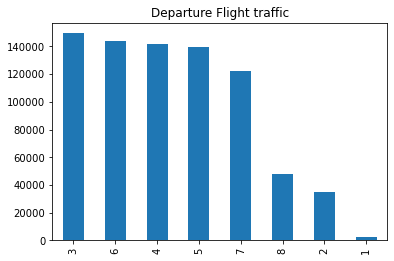

In [27]:
flights_sample_taxi['binned_dep'].value_counts().plot.bar(title='Departure Flight traffic')

<AxesSubplot:title={'center':'Arrival Flight traffic'}>

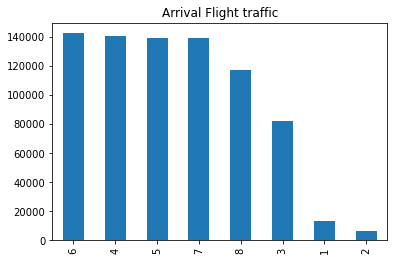

In [28]:
flights_sample_taxi['binned_arr'].value_counts().plot.bar(title='Arrival Flight traffic')

Departure traffic is more in the bin 3 which is between 6am to 9am and Arrival traffic is almost same in the bins 4,5,6,7 which is between 9am to 9pm.

<AxesSubplot:title={'center':'Departure time and taxi out'}, xlabel='binned_dep'>

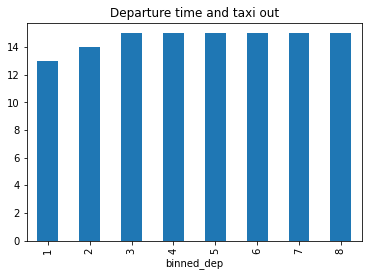

In [29]:
flights_sample_taxi.groupby(['binned_dep'])['taxi_out'].median().plot.bar(title='Departure time and taxi out')

<AxesSubplot:title={'center':'Arrival time and taxi in'}, xlabel='binned_arr'>

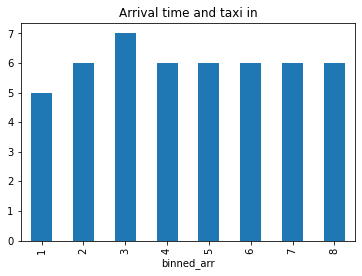

In [30]:
flights_sample_taxi.groupby(['binned_arr'])['taxi_in'].median().plot.bar(title='Arrival time and taxi in')


The taxi in and taxi out are more when the departure arrival traffic is more.

#####  Are arrival delays caused by departure delays? Are airlines able to lower the delay during the flights?

In [31]:
df = flights[['dep_delay','arr_delay']].dropna()
df['diff'] = flights.arr_delay - flights.dep_delay

pct_delay = df[df['diff'] <=0].shape[0] / df.shape[0]
pct_other = df[df['diff'] >0].shape[0] / df.shape[0]
print(pct_delay)
print(pct_other)

0.7383025877530105
0.2616974122469895


Average percentage of delays already created before departure is pct_delay which is 0.738. The flights are able to lower the delay during flight as many flights had a shorter arrival delay than their departure delay

##### How many states cover 50% of US air traffic?

In [32]:
flights_sample_states = flights.filter(['origin_airport_id','origin','origin_city_name','dest_airport_id', 'dest', 'dest_city_name','air_time','year','month'], axis=1)

In [33]:
city_split1 = flights_sample_states['origin_city_name'].str.split(',')
flights_sample_states['origin_city'] = [x[0] for x in city_split1]
flights_sample_states['origin_state'] = [x[1] for x in city_split1]
city_split2 = flights_sample_states['dest_city_name'].str.split(',')
flights_sample_states['dest_city'] = [x[0] for x in city_split2]
flights_sample_states['dest_state'] = [x[1] for x in city_split2]

In [34]:
states_2018=flights_sample_states.loc[flights_sample_states['year'] == '2018', 'origin_state'].value_counts()
states_2019=flights_sample_states.loc[flights_sample_states['year'] == '2019', 'origin_state'].value_counts()
df_states_2018=pd.DataFrame(states_2018)
df_states_2019=pd.DataFrame(states_2019)

In [35]:
df_states_2018['percentage']=df_states_2018['origin_state']*100/df_states_2018.origin_state.sum()
df_states_2019['percentage']=df_states_2019['origin_state']*100/df_states_2019.origin_state.sum()

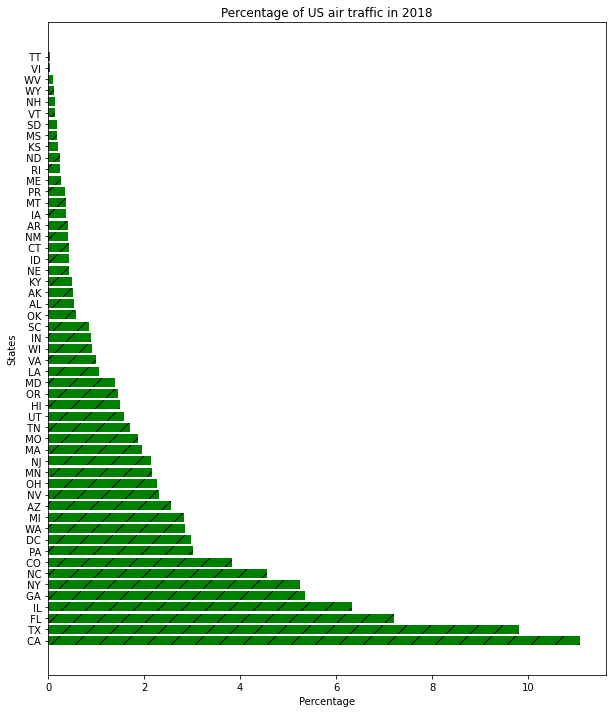

In [36]:
plt.barh(df_states_2018.index,df_states_2018.percentage,  color='green', hatch='/')


plt.ylabel("States")
plt.xlabel("Percentage")
plt.title("Percentage of US air traffic in 2018")

fig = plt.gcf()
fig.set_size_inches(10, 12)
fig.savefig('airtraffic2018.png', dpi=100)

plt.show()

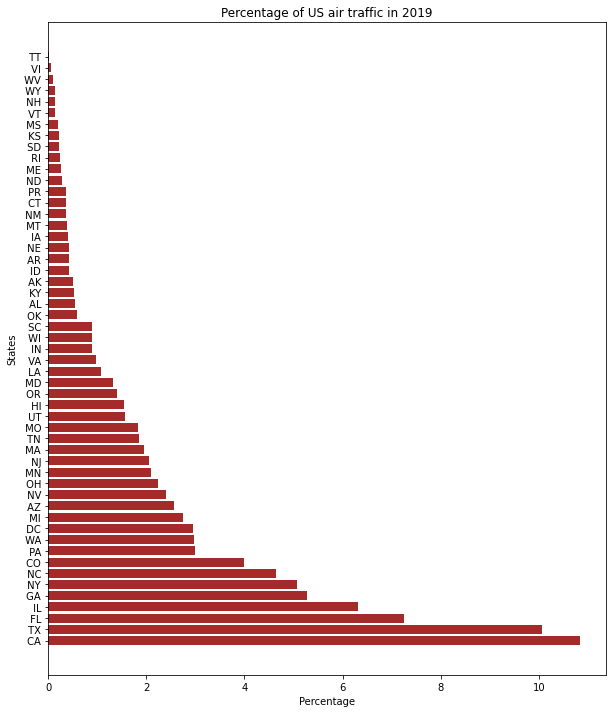

In [37]:
plt.barh(df_states_2019.index,df_states_2019.percentage,  color='brown')


plt.ylabel("States")
plt.xlabel("Percentage")
plt.title("Percentage of US air traffic in 2019")

fig = plt.gcf()
fig.set_size_inches(10, 12)
fig.savefig('airtraffic2019.png', dpi=100)

plt.show()

In [38]:
print(df_states_2018.iloc[:8].sum())
print(df_states_2018.iloc[:8])

origin_state    209070.000000
percentage          53.366312
dtype: float64
     origin_state  percentage
 CA         43340   11.062783
 TX         38403    9.802585
 FL         28186    7.194638
 IL         24803    6.331108
 GA         20915    5.338673
 NY         20571    5.250865
 NC         17865    4.560143
 CO         14987    3.825517


##### Will the planes fly faster when there is the departure delay? 

In [39]:
df = flights[['dep_delay','arr_delay']].dropna()
df['diff'] = flights.arr_delay - flights.dep_delay
no_delay = df[df.dep_delay <=0]['diff']
has_delay = df[df.dep_delay >0]['diff']


In [40]:
stat, p = stats.ttest_ind(no_delay.values, has_delay.values)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


stat=-19.869, p=0.000
Probably different distributions


H0 that delays and non-delays have the same mean
p < alpha so there is sufficient evidence to support the claim that has_delays has a different mean than no_delays''' 


##### When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [41]:
temp = flights[['air_time','dep_time']].dropna()

conditions = [temp.air_time <= 3*60,
              (temp.air_time > 3*60) & (temp.air_time <= 7*60),
              temp.air_time > 7*60]

choices = ['short_haul','medium_haul','long_haul']

temp['flight_cat'] = np.select(conditions, choices, default=0)
# with flight_cat made, don't need air_time
temp.drop('air_time',axis=1, inplace=True)
temp.dep_time = temp.dep_time.astype(int).astype(str)
def hours(x):
    if len(x) > 2:
        return int(x[:-2]) + int(x[-2:])/60 
    else:
        return int(x[-2:])/60

temp.dep_time = temp.dep_time.map(lambda x: int(hours(x)//1) )
temp.head()

,dep_time,flight_cat
0,7,short_haul
1,5,short_haul
2,11,short_haul
3,15,short_haul
4,22,short_haul


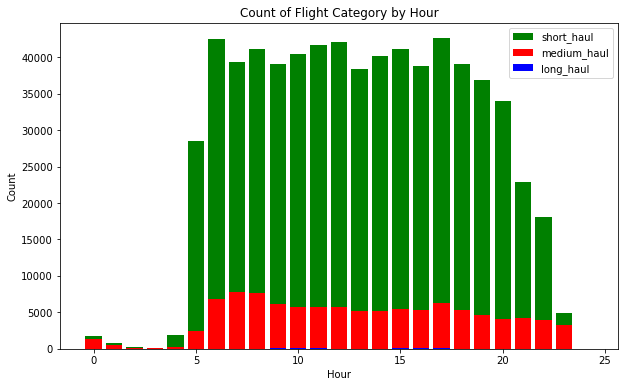

In [42]:
x1 = temp[temp.flight_cat == 'short_haul'].groupby('dep_time').count().reset_index()
x2 = temp[temp.flight_cat == 'medium_haul'].groupby('dep_time').count().reset_index()
x3 = temp[temp.flight_cat == 'long_haul'].groupby('dep_time').count().reset_index()

fig, axes = plt.subplots(figsize = (10,6))
axes.bar(x1.dep_time.values, x1.flight_cat.values, color='g', label='short_haul' )
axes.bar(x2.dep_time.values, x2.flight_cat.values, color='r', label='medium_haul')
axes.bar(x3.dep_time.values, x3.flight_cat.values, color='b', label='long_haul')
axes.set(title='Count of Flight Category by Hour', ylabel='Count', xlabel='Hour')
plt.legend()

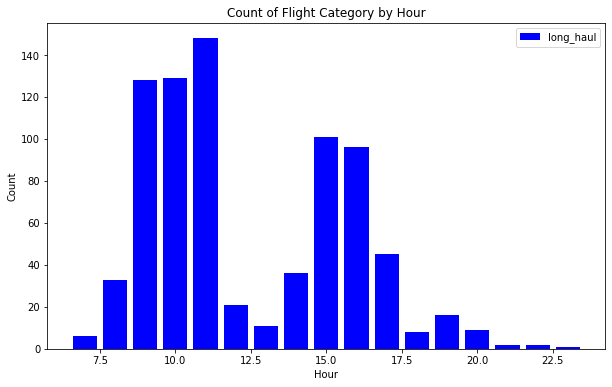

In [43]:
x3 = temp[temp.flight_cat == 'long_haul'].groupby('dep_time').count().reset_index()

fig, axes = plt.subplots(figsize = (10,6))
axes.bar(x3.dep_time.values, x3.flight_cat.values, color='b', label='long_haul')
axes.set(title='Count of Flight Category by Hour', ylabel='Count', xlabel='Hour')
plt.legend()

##### Finding the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [44]:
df1 = passengers[['passengers','origin_city_name']]
df1 = df1.rename(columns={'origin_city_name':'airport_id'})
df2 = passengers[['passengers','dest_city_name']]
df2 = df2.rename(columns={'dest_city_name':'airport_id'})
df3 = pd.concat((df1,df2), axis=0)
df3.groupby('airport_id').sum().sort_values('passengers', ascending=False).head(10)

,passengers
airport_id,
"Atlanta, GA",515300223
"Chicago, IL",498550393
"New York, NY",447451637
"Los Angeles, CA",410933768
"Dallas/Fort Worth, TX",328157387
"Denver, CO",302146412
"Houston, TX",276163311
"San Francisco, CA",267290706
"Las Vegas, NV",235167182


In [45]:
df1 = passengers[['origin_city_name']]
df1 = df1.rename(columns={'origin_city_name':'city_name'})
df2 = passengers[['dest_city_name']]
df2 = df2.rename(columns={'dest_city_name':'city_name'})
df3 = pd.concat((df1,df2), axis=0)
df3['city_name'].value_counts().head(10)

Chicago, IL              180730
Atlanta, GA              131677
New York, NY             119973
Denver, CO               114665
Houston, TX              110690
Los Angeles, CA          103004
Detroit, MI               95280
Dallas/Fort Worth, TX     92821
Washington, DC            92649
Minneapolis, MN           86735
Name: city_name, dtype: int64

##### Do bigger delays lead to bigger fuel comsumption per passenger?

We need to do four things to answer this as accurate as possible:
Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
Find out distance covered monthly by different air carriers
Find out number of passengers that were carried by different air carriers
Find out total fuel consumption per air carrier.
Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays? 

In [46]:
total_monthly_passengers_per_carrier = passengers[passengers.year.isin([2018, 2019])].groupby('unique_carrier').sum()['passengers']
passengers.unique_carrier.unique().shape

(377,)

In [47]:
tot_monthly_fuel_per_carrier = fuel[fuel.year.isin([2018, 2019])].groupby('unique_carrier').sum()['total_gallons']


Rows are less than  fuel.unique_carrier.unique() likely because there are carriers that only flew in other years than the ones we've selected. 

In [48]:
carrier=flights.filter(['op_unique_carrier','dep_delay','arr_delay','month'], axis=1)
carrier.rename(columns={'op_unique_carrier':'carrier','arr_delay':'delay'},inplace=True)
air_carrier_delay=pd.DataFrame(carrier.groupby(['carrier','month'])['delay'].mean())
# Delay used is only Arrival Delay as that would include the Departure Delay


In [51]:
len(flights.groupby('op_unique_carrier').count())

28

In [52]:
distance=flights.filter(['op_unique_carrier','distance','month'])
distance.rename(columns={'op_unique_carrier':'carrier'},inplace=True)
carrier_distance=pd.DataFrame(distance.groupby(['carrier','month'])['distance'].sum())
carrier_distance.head()

distance
carrier month          
9E      01       869550
        02       833194
        03      1016790
        04      1015072
        05       998126

In [53]:
carrier_distance.reset_index()

,carrier,month,distance
0,9E,01,869550
1,9E,02,833194
2,9E,03,1016790
3,9E,04,1015072
4,9E,05,998126
...,...,...,...
315,ZW,08,354061
316,ZW,09,335590
317,ZW,10,346677
318,ZW,11,335692


In [54]:
h1 = total_monthly_passengers_per_carrier.reset_index()
h2 = tot_monthly_fuel_per_carrier.reset_index()
h3 = h2.merge(h1, how='left',on='unique_carrier')
h3.rename(columns={'unique_carrier':'carrier'}, inplace=True)
carrierlist = h3.carrier.to_list()

In [55]:
h4 = carrier_distance.reset_index()
h4 = h4[h4.carrier.isin(carrierlist)]
h5 = h4.merge(h3, how='left',on='carrier')
h5 = h5[h5.total_gallons !=0]
h5['avg_gall_pass_km'] = h5.total_gallons / h5.passengers  / h5.distance
h5.head()

,carrier,month,distance,total_gallons,passengers,avg_gall_pass_km
12,AA,01,7483035,6.416096e+09,304746529,0.000003
13,AA,02,6995272,6.416096e+09,304746529,0.000003
14,AA,03,7975192,6.416096e+09,304746529,0.000003
15,AA,04,7689672,6.416096e+09,304746529,0.000003
16,AA,05,7866868,6.416096e+09,304746529,0.000003


In [58]:
h5['carrier_month'] = h5.carrier + h5.month.astype(str)
h5.head()

,carrier,month,distance,total_gallons,passengers,avg_gall_pass_km,carrier_month
12,AA,01,7483035,6.416096e+09,304746529,0.000003,AA01
13,AA,02,6995272,6.416096e+09,304746529,0.000003,AA02
14,AA,03,7975192,6.416096e+09,304746529,0.000003,AA03
15,AA,04,7689672,6.416096e+09,304746529,0.000003,AA04
16,AA,05,7866868,6.416096e+09,304746529,0.000003,AA05


In [56]:
h6 = air_carrier_delay.reset_index()
h6['carrier_month'] = h6.carrier + h6.month.astype(str)
h6.head()

,carrier,month,delay,carrier_month
0,9E,01,3.194748,9E01
1,9E,02,2.717070,9E02
2,9E,03,2.954590,9E03
3,9E,04,8.391178,9E04
4,9E,05,-0.049583,9E05


In [59]:
h7 = h6.merge(h5,how='left',on='carrier_month').dropna()
h7.head()

,carrier_x,month_x,delay,carrier_month,carrier_y,month_y,distance,total_gallons,passengers,avg_gall_pass_km
17,AA,01,1.717503,AA01,AA,01,7483035.0,6.416096e+09,304746529.0,0.000003
18,AA,02,4.317717,AA02,AA,02,6995272.0,6.416096e+09,304746529.0,0.000003
19,AA,03,2.770161,AA03,AA,03,7975192.0,6.416096e+09,304746529.0,0.000003
20,AA,04,3.664842,AA04,AA,04,7689672.0,6.416096e+09,304746529.0,0.000003
21,AA,05,10.507044,AA05,AA,05,7866868.0,6.416096e+09,304746529.0,0.000003


In [60]:
h8 = h7[['carrier_x','month_x','delay','avg_gall_pass_km']]
h8.head()

,carrier_x,month_x,delay,avg_gall_pass_km
17,AA,01,1.717503,0.000003
18,AA,02,4.317717,0.000003
19,AA,03,2.770161,0.000003
20,AA,04,3.664842,0.000003
21,AA,05,10.507044,0.000003


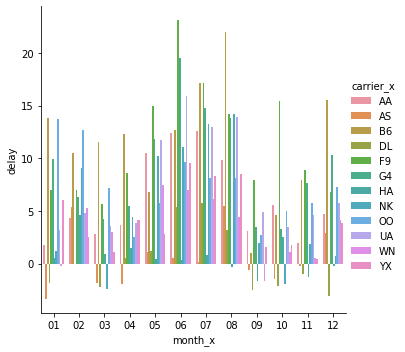

In [61]:
g = sns.catplot(x="month_x",y="delay",kind='bar',hue='carrier_x',order=['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'],ci=False,data=h8)

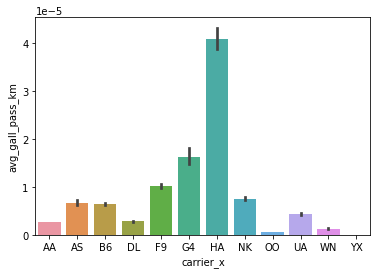

In [62]:
ax2 = sns.barplot(data = h8, x='carrier_x',y='avg_gall_pass_km')

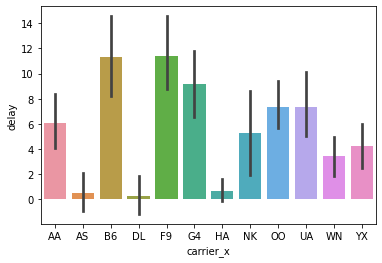

In [63]:
ax = sns.barplot(data = h8, x='carrier_x',y='delay')